In [1]:
# Disclaimer:
# 
# THIS IS NOT MEDICAL OR SCIENTIFIC INFORMATION. 
# I AM NOT A DOCTOR OR EPIDEMIOLOGIST.
# 
# The notebooks and code in this repository are meant 
# to explore and illustrate exponential growth, and the 
# effect of different variables (such as growth rates) on 
# that growth.  Both the information about the virus, as 
# well as the mathematics, or other info could be incorrect, 
# out of date, or otherwise wrong.  
# 
# Please refer to public health officials or a medical doctor
# for accurate information about the virus as it actually 
# pertains to reality.

In [15]:
# R0 values for seasonal flu (1.3), 
# and low and high estimates for SARS-CoV-2 coronavirus
r = [1.3, 2, 2.5]

In [16]:
infected = [1 for _ in range(len(r))]
rows = []
for _ in range(20):
    rows.append(tuple(infected))
    for i in range(len(infected)):
        infected[i] *= r[i]
#rows

In [17]:
# Convert to integer and format with commas
display_rows = [[f"{int(col):,}" for col in row] for row in rows]

In [18]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(display_rows, tablefmt='html')))

1,1,1
1,2,2
1,4,6
2,8,15
2,16,39
3,32,97
4,64,244
6,128,610
8,256,"1,525"
10,512,"3,814"
13,"1,024","9,536"


In [19]:
import matplotlib.pyplot as plt
import numpy as np

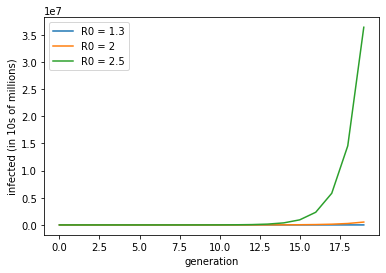

In [26]:
plt.plot(rows)
plt.xlabel("generation")
# seems to be showing it in 10s of millions for some reason
plt.ylabel("infected (in 10s of millions)")
line_labels = [f"R0 = {rvalue}" for rvalue in r]
plt.legend(line_labels)
plt.show()